In [1]:
%matplotlib inline 
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
from time import time

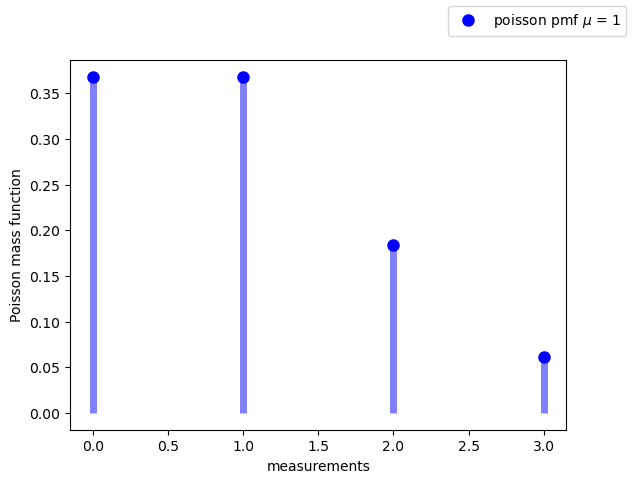

In [2]:
# Question 1 A 
# I choose X = 1 as the parameter for the poisson distribution
# The Poisson pdf is below, and we can see the graph later with more days of convolution
x = np.arange(stats.poisson.ppf(0.01, 1),stats.poisson.ppf(0.99, 1))
fig,ax = plt.subplots()
pdf = stats.poisson.pmf(x, 1)
ax.plot(x,pdf , 'bo', ms=8, label='poisson pmf $\mu$ = 1')
ax.vlines(x, 0, stats.poisson.pmf(x, 1), colors='b', lw=5, alpha=0.5)
ax.set_xlabel("measurements")
ax.set_ylabel("Poisson mass function")
fig.legend()

In [3]:
# Define the Convolv function takes "count" times convolution of probability density function 
def convolv(A,old,count):
    if(count == 1):
        return old
    else:
        temp = np.convolve(A,old)
        return convolv(A,temp,count-1)

In [4]:
# We can refer to the graph below where we convolve 5 days of Poisson distribution

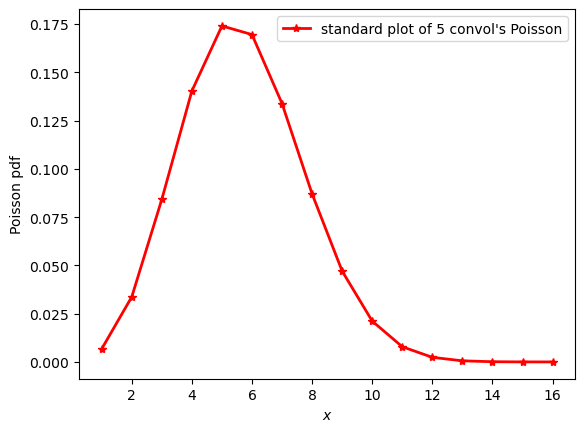

In [33]:
# B
new_pdf = convolv(pdf,pdf,5) # We convolve Poisson's pdf 5 times 
length = len(new_pdf)
fig2,ax2 = plt.subplots()
y = np.linspace(1,16,16)
ax2.plot(y,new_pdf,'r*-',lw="2",label="standard plot of 5 convol's Poisson")
ax2.set_xlabel("$x$")
ax2.set_ylabel("Poisson pdf")
ax2.legend()
# We can see from the plot below that the distribution still looks like Poisson, 
# we can change the y scale to log function

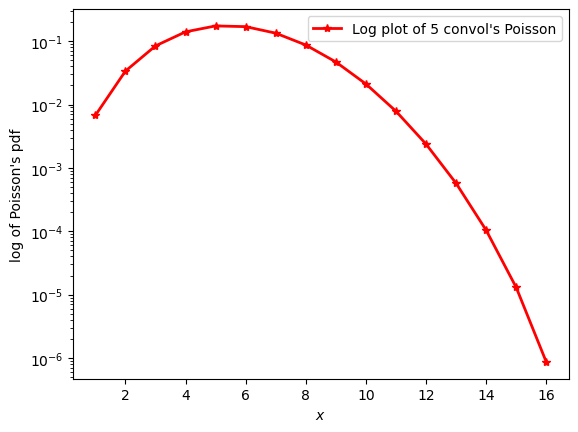

In [28]:
fig10,ax10 = plt.subplots()
plt.yscale("log")
ax10.plot(y,new_pdf,'r*-',lw="2",label="Log plot of 5 convol's Poisson")
ax10.set_xlabel("$x$")
ax10.set_ylabel("log of Poisson's pdf")            
ax10.legend()

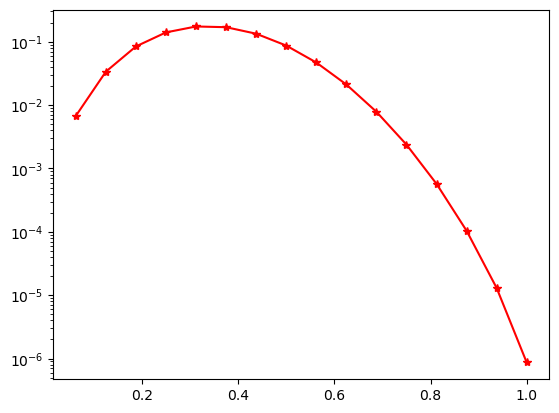

In [31]:
# C
y = np.linspace(1,16,16)
fig3,ax3 = plt.subplots()
plt.yscale("log")
ax3.plot(y/len(y),new_pdf,'r*-',label="Averaged log plot of Poisson")

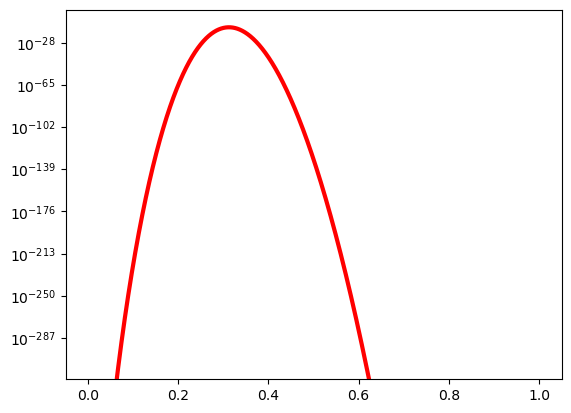

In [32]:
new_pdf2 = convolv(pdf,pdf,1500) # convolve 1500 times
length = len(new_pdf2)
fig3,ax3 = plt.subplots()
plt.yscale("log")
y = np.linspace(1,length,length)
ax3.plot(y/len(y),new_pdf2,'r',lw="3",label="Averaged log plot after 1500 convolutions")

In [11]:
# we can find that as we convolute 1500 days, we can find the pdf becoming more like Gaussian, just like what 
# we were expecting from the central limit theorem

In [35]:
# pick Y = 4 >> 1, and N = 50
Y = 4
N = 50
new_pdf = convolv(pdf,pdf,N)
res = np.cumsum(new_pdf)
# I would expect the Y*N is the last element in this array since the max result is Y*N = 200
prob = res[-1]
sigma = stats.norm.ppf(1-prob)
sigma

0.2964235162523031

In [12]:
#Question 2

In [42]:
x = np.linspace(stats.rayleigh.ppf(0.01),stats.rayleigh.ppf(0.99), 100)
pdf = stats.rayleigh.pdf(x)

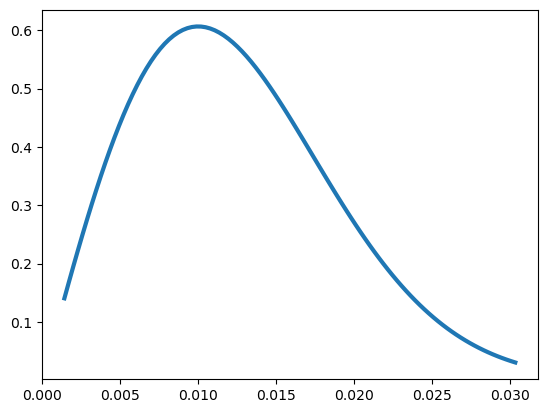

In [43]:
fig5,ax5 = plt.subplots()
ax5.plot(x/len(x),pdf,lw = "3")

In [55]:
new_pdf = convolv(pdf,pdf,3)
x1 = np.linspace(3,3*len(x),len(x)+2*(len(x)-1))

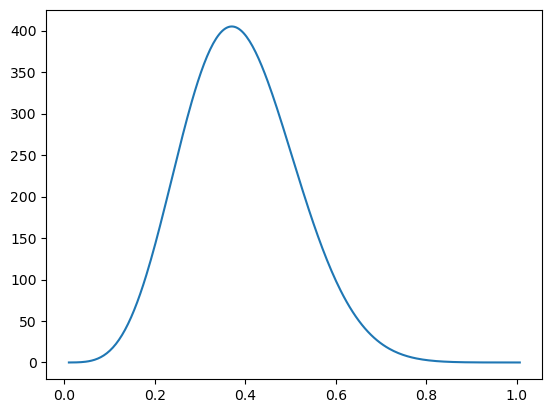

In [56]:
fig,ax = plt.subplots()
#plt.yscale("log")
ax.plot(x1/len(x1),new_pdf)

In [64]:
new_pdf1 = convolv(pdf,pdf,8)
x2 = np.linspace(8,8*len(x),len(x)+7*(len(x)-1))

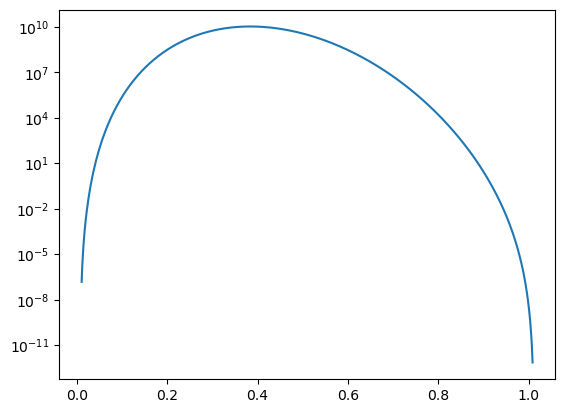

In [65]:
fig2,ax2 = plt.subplots()
plt.yscale("log")
ax2.plot(x2/len(x2),new_pdf1)

In [87]:
# It's approaching towards Gaussian distribution as shown from the graph above. 
# The pattern is quite obvious after 8 convolutions of Rayleigh distribution

In [88]:
# Question 3

In [21]:
x = np.linspace(stats.norm.ppf(0.01),stats.norm.ppf(0.99),1000)

In [22]:
pdf = stats.norm.pdf(x)

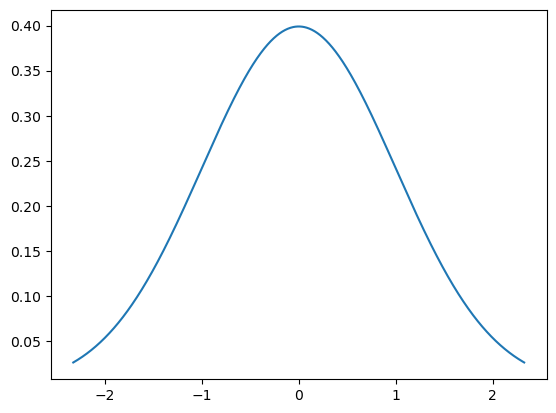

In [23]:
fig,ax = plt.subplots()
ax.plot(x,pdf)

In [24]:
# Version 1 A 
# Assuming we read 5.5 as Y
# Let's assume the Gaussian distribution has standard deviation of 1 and mean of 0. 
# So the sigma in this distribution is (Y- mu) = sigma where mu = 0 in this case
# So the question is : If there is no signal, what is the probability of reading Y or more than Y due to the background noise?
# Thus sigma = 5.5 > 5
# Thus the reading of 5.5 is significant

In [89]:
# Version 2 B
# The statistical question we can ask is : 
# What's the probability to find the signal-like or more than that from the background noise from all of 10k pixels?
# To solve the problem, we need to first find out the new pdf after multiplying Gaussian's pdf 10k times 

In [90]:
x = np.linspace(stats.norm.ppf(0.01),stats.norm.ppf(0.99),1000)
pdf = stats.norm.pdf(x)
pixel = 10000

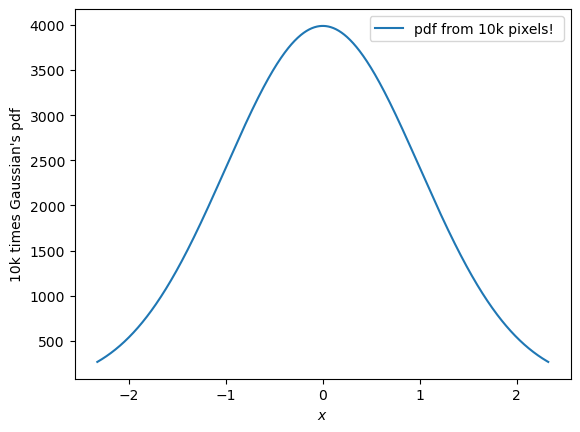

In [91]:
fig,ax = plt.subplots()
ax.plot(x,pdf*pixel,label="pdf from 10k pixels! ")
ax.set_xlabel("$x$")
ax.set_ylabel("10k times Gaussian's pdf")
plt.legend()

In [ ]:
# After having the new probability density function of 10k pixels, we want to find what is the value of sigma if we have a 
# reading of 5.5 from part A?
# The math we need to do is same as our Lab 1 probelm:

Integral :  $$1 - \int_{5.5}^{\infty} pdf(x) dx $$

In [41]:
# With the value of probability, we can then use norm.ppf() to convert the value back to the corresponding sigma:
sigma = stats.norm.ppf((1 - stats.norm.cdf(5.5))* pixel)
sigma

-3.553742240574179

In [ ]:
# Question 4A
# for version 1, recall that we have a normal distribution with mean = 0 and std deviation = 1
# The minimum signal required for a 5-sigma detection is 5

In [43]:
# 4B
# for version 2, since our pdf has changed after multiplying pdf 10k times, we need to ask :
# With the new probability density function, what is the probability of some seemingly significant readings are actually from
# the background noise? 
# So we can write the new integral as follows: 
# and we want to find the values of ??? in this case such that norm.ppf() of the follow result can yield more than 5 sigma's 
# significance 

Integral :  $$1 - \int_{???}^{\infty} new\ pdf(x) dx $$

In [7]:
#code: 
sigma5 = 1/3.5e6
det = stats.norm.ppf(1- sigma5/pixel)
det

6.551026394051586

In [8]:
# Thus, we can find that to have a 5 sigma significance detection, we need at least 6.55 of detection

In [10]:
# C 
# So before the trial factors of 10k, the minimum reading theshold is 5;
# After the trial factors, we need at least 6.55, so we need :
(6.55 - 5)*100 / 5
# around 31% brighter signal than no-trial factoring case
# The sensitivity penalty due to trial factor is so low since we are measureing data with Gaussian distribution

30.999999999999993

In [11]:
# if we change the trial factos significantly, say we change from 10k to 1000k, our threshold became to be :
pixel = 1000000
stats.norm.ppf(1- sigma5/pixel)
# we need at least around 7.21 signal

7.207157100988285

In [ ]:
# To have a better visualization of the change, we can use matplotlib to demo

In [37]:
index = 0
pixels = np.logspace(1,10,num = 10, base = 10)
res = np.ones(10)
while(index < len(pixels)) :
    pixel = pixels[index]
    res[index] = stats.norm.ppf(1- sigma5/pixel)
    index+=1

Text(0, 0.5, 'threshold')

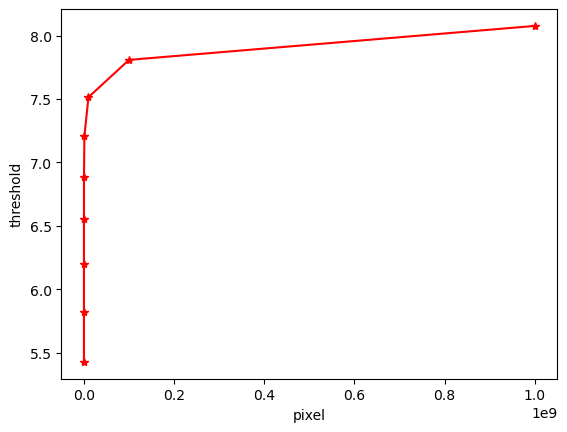

In [38]:
fig,ax = plt.subplots()
ax.plot(pixels,res,'r*-')
ax.set_xlabel("pixel")
ax.set_ylabel("threshold")

In [33]:
# From the plot above, we can find that as we increase trial factos by multiplying 10 each time, 
# our threshold increase as well